# EDA of Sentences Given

In [7]:
!pip install scikit-optimize

  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from skopt import BayesSearchCV

In [180]:
#Return visualizations for each fold

data = pd.read_csv('./eda_booker_report.csv', index_col='Unnamed: 0')

def eda(model, target):
    model_info = f"""Model info
    Best Estimator: {model.best_estimator_}
    N Splits: {model.n_splits_}
    N Features In: {model.n_features_in_}
    Best Score: {model.best_score_}
    """
    print(model_info)
    
    X_data = data.drop(columns=[target])
    columns = list(X_data.columns)
    # print(columns)

    for idx in range(len(columns)):
        # print(f'{columns[idx]}\n')
        plt.plot(pd.DataFrame(model.best_estimator_.coef_)[idx])
        plt.title(f"Coefficients for {columns[idx]} for each class")
        plt.show()

In [181]:
target_classes = pd.DataFrame([
    {0: "No Prison/Probation (Fine Only)",
    1: "Prison Only (No Alternatives)",
    2: "Prison + Confinement Conditions (Alternatives, Including Zone C Split Sentences)",
    3: "Probation + ConfinementConditions (Alternatives)",
    4: "Probation Only"}]).T

In [182]:
baseline = pd.DataFrame(data['SENTIMP'].value_counts(normalize = True)).merge(target_classes, left_index=True, right_index=True)
baseline

,SENTIMP,0
1,0.841974,Prison Only (No Alternatives)
4,0.074353,Probation Only
3,0.047160,Probation + ConfinementConditions (Alternatives)
2,0.034800,"Prison + Confinement Conditions (Alternatives,..."
0,0.001714,No Prison/Probation (Fine Only)


## BayesSearchCV

In [183]:
with open('./sentimp/sentimp_bs_lg', 'rb') as p_in_bs:
    bs_logreg = pickle.load(p_in_bs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/7l/441dnk_52sgfldpwf_5_7dmr0000gn/T/ipykernel_58443/3447040756.py:2: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  bs_logreg = pickle.load(p_in_bs)


Model info
    Best Estimator: LogisticRegression(C=1048.1131341546852, max_iter=1000000, random_state=42)
    N Splits: 5
    N Features In: 27
    Best Score: 0.9174196428571427
    


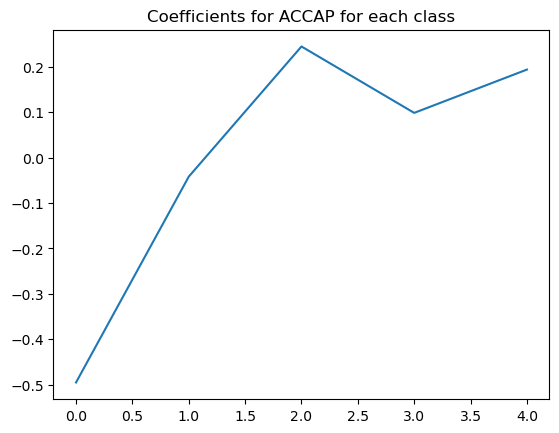

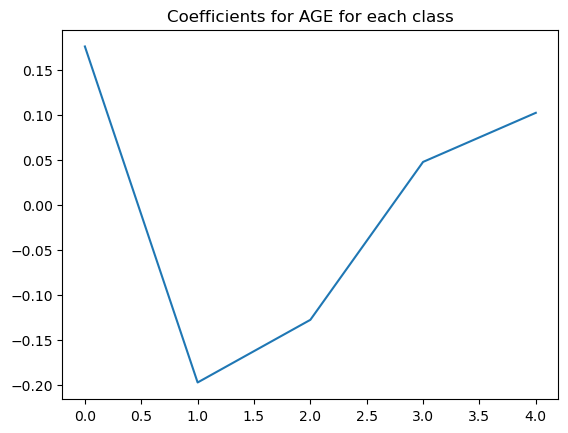

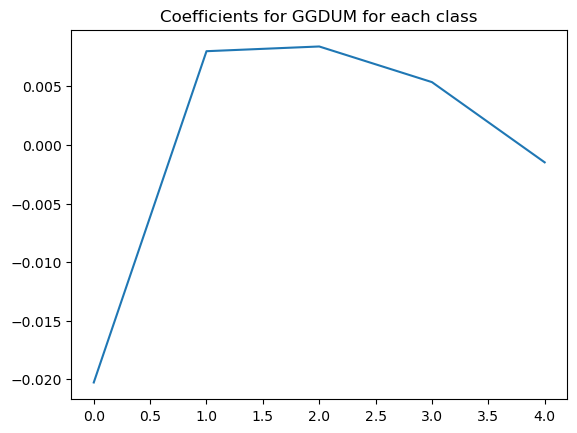

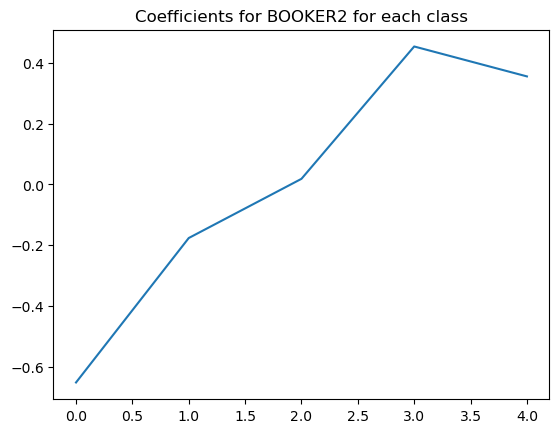

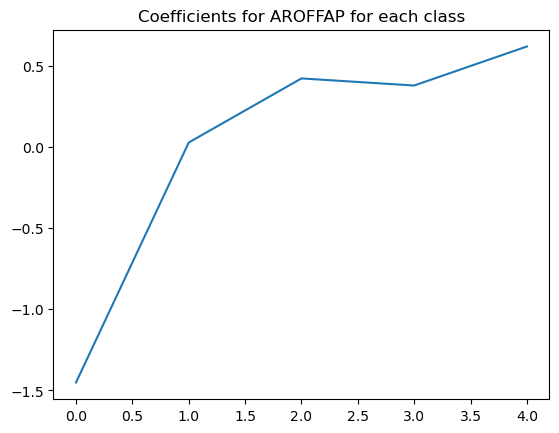

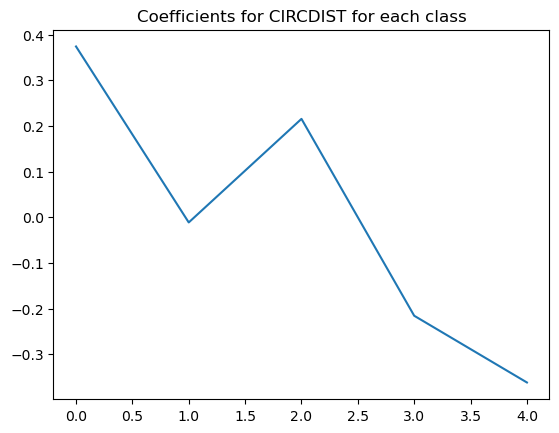

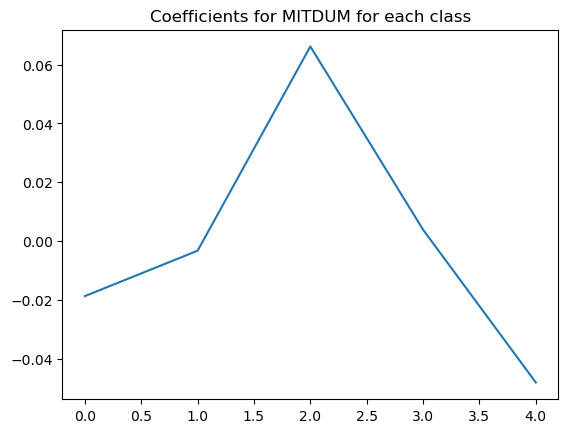

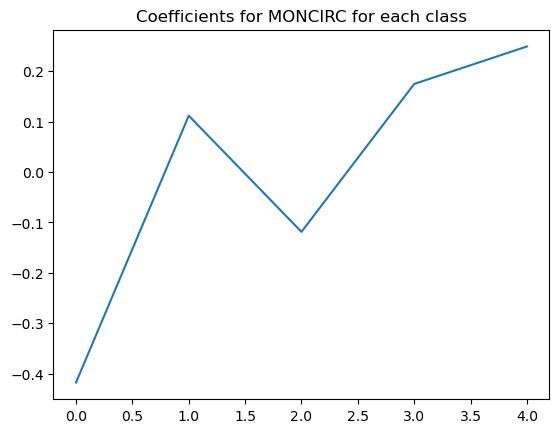

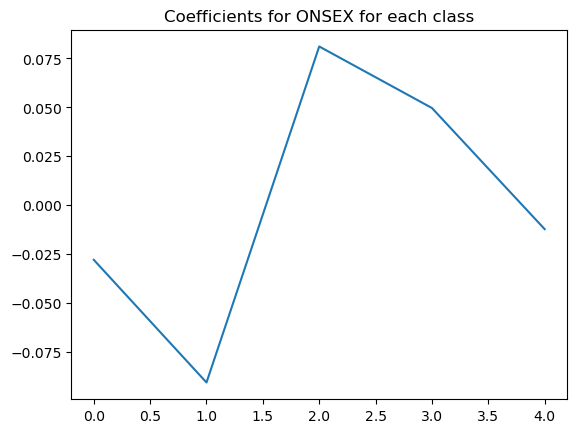

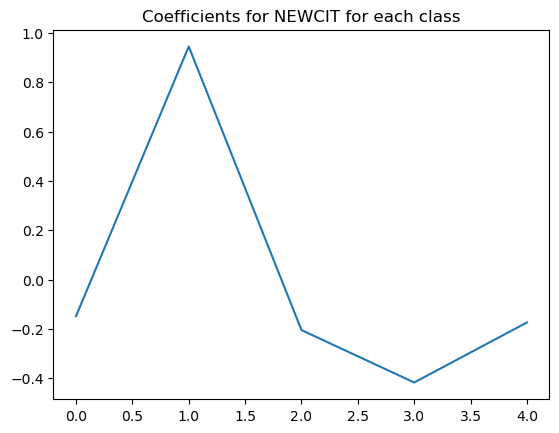

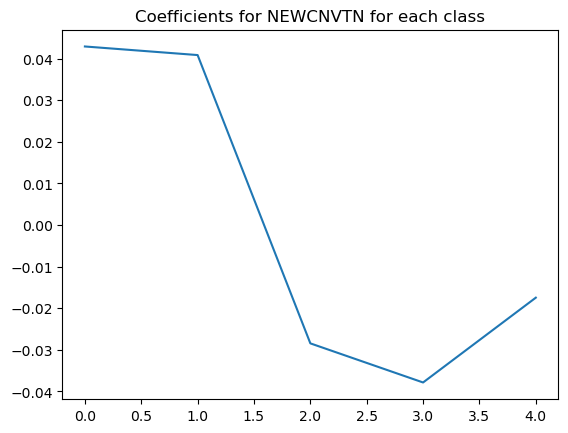

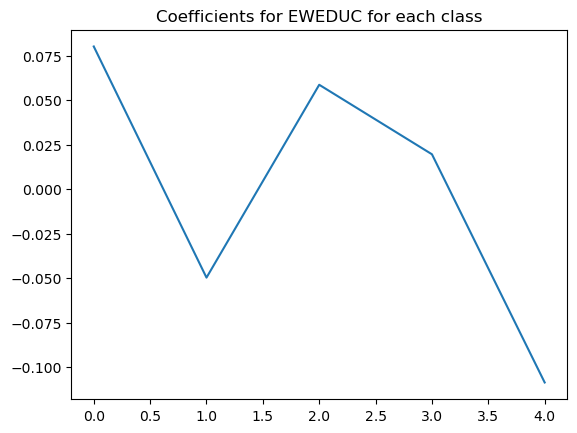

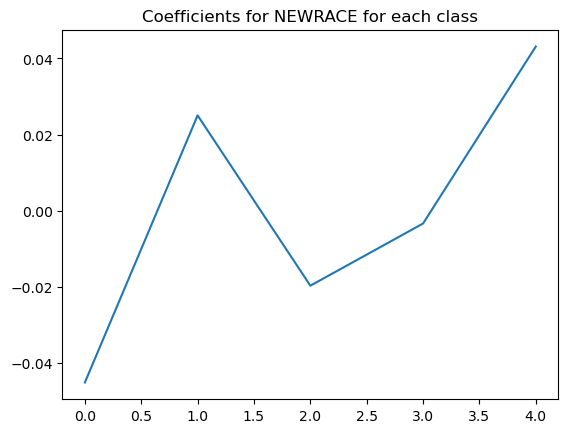

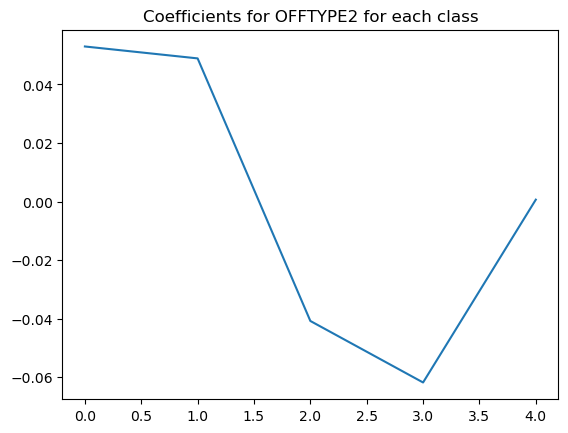

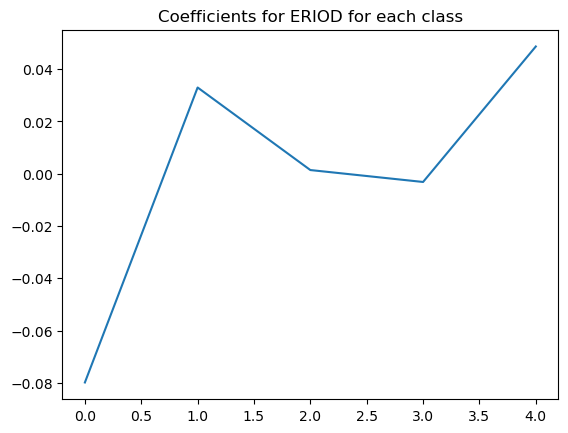

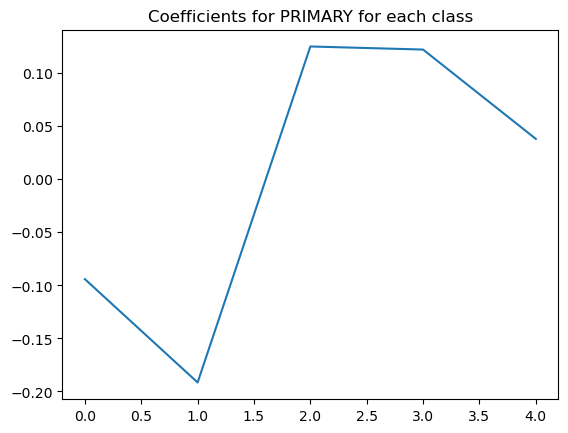

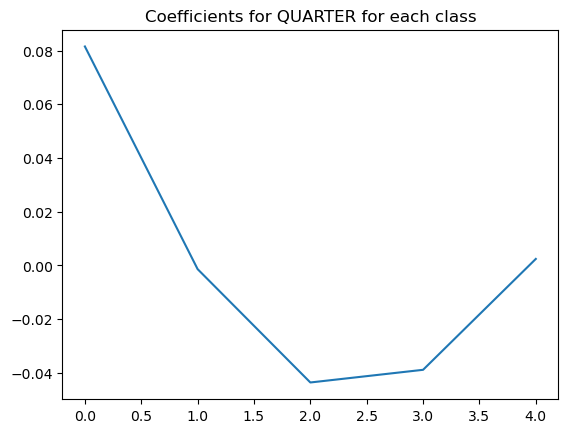

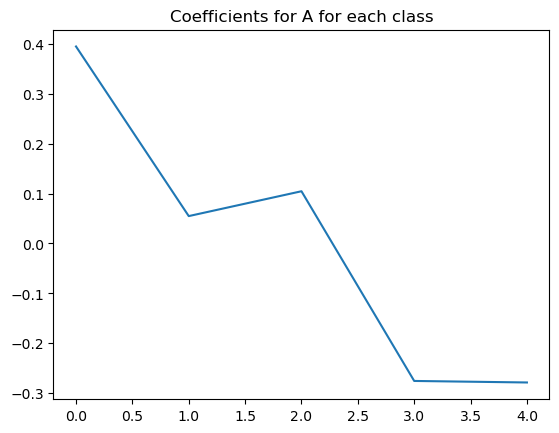

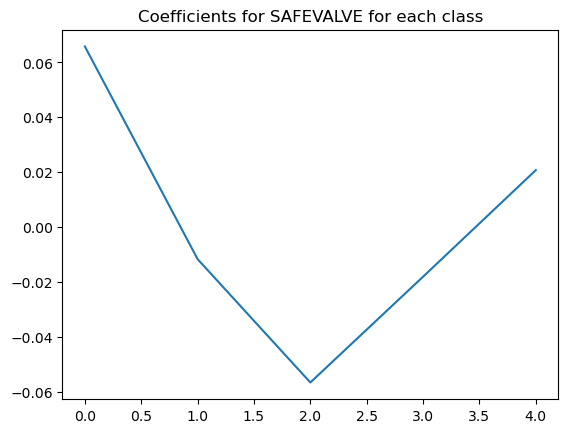

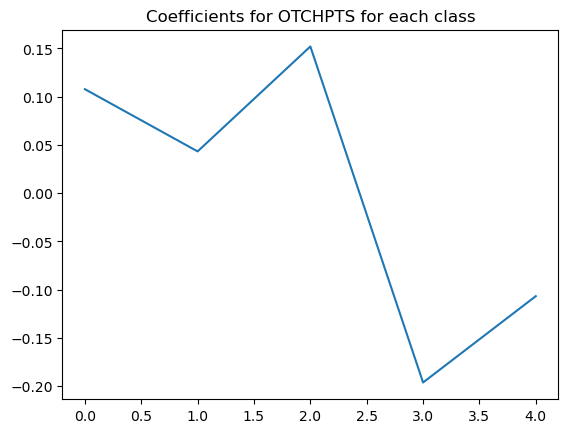

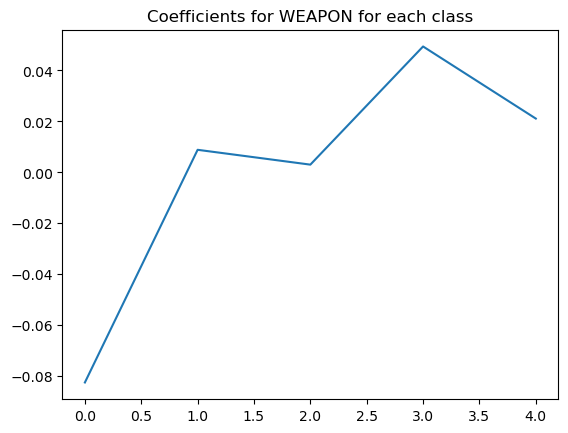

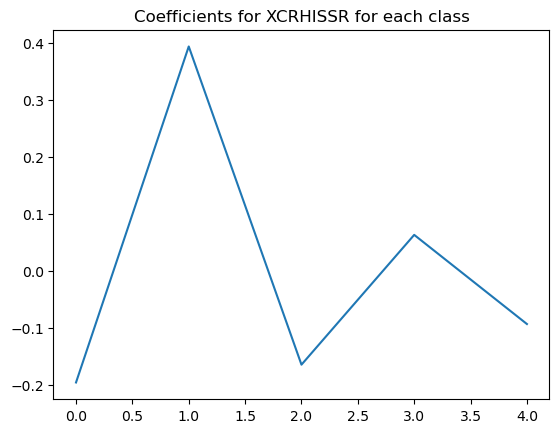

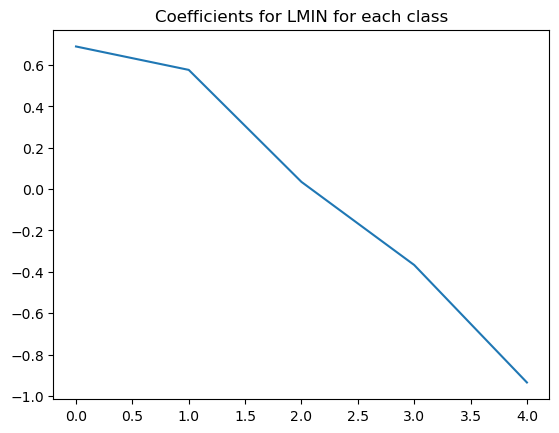

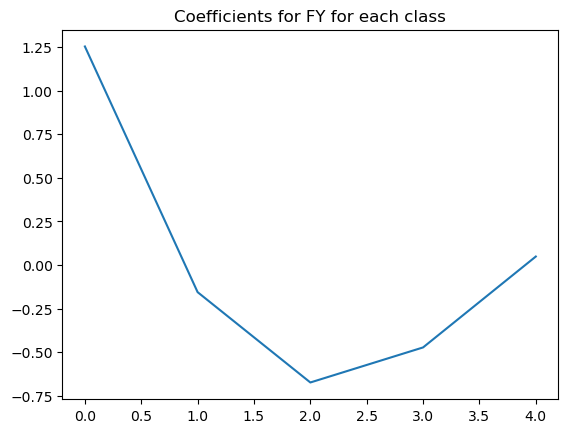

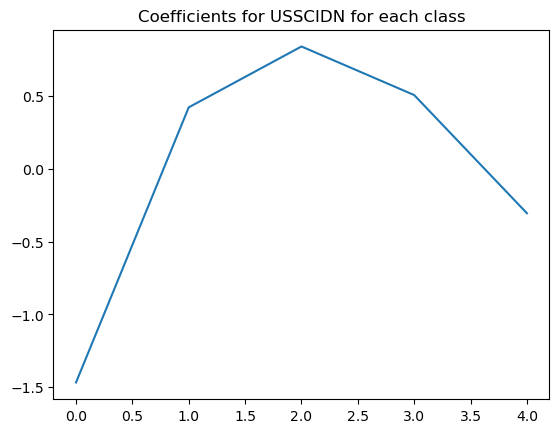

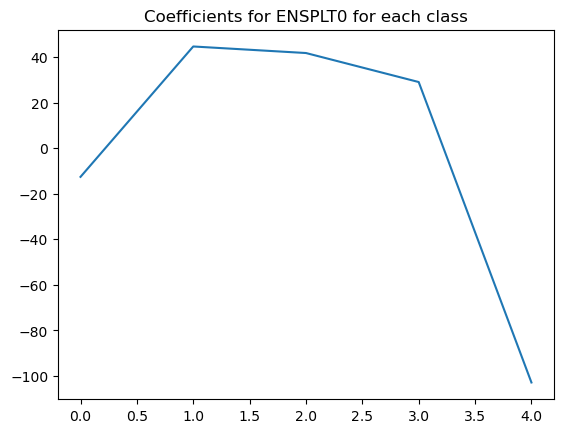

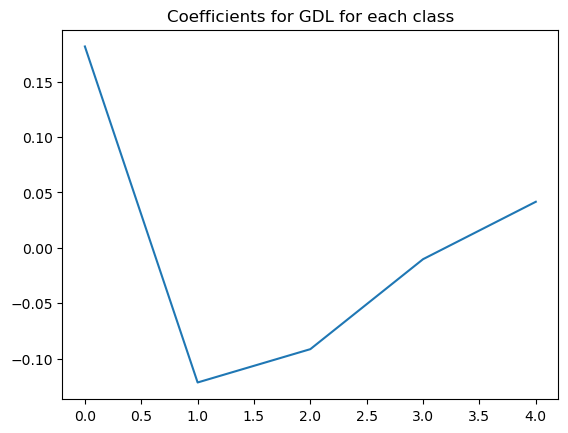

In [184]:
eda(bs_logreg, 'SENTIMP')

## GridSearchCV

In [185]:
with open('./sentimp/sentimp_gs_lg', 'rb') as p_in_gs:
    gs_logreg = pickle.load(p_in_gs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model info
    Best Estimator: LogisticRegression(C=1000, random_state=42)
    N Splits: 5
    N Features In: 27
    Best Score: 0.9151607142857143
    


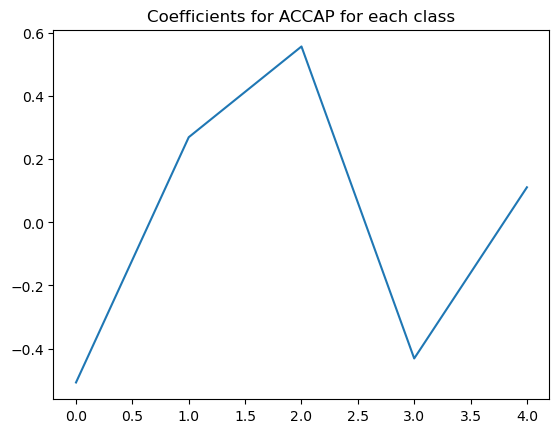

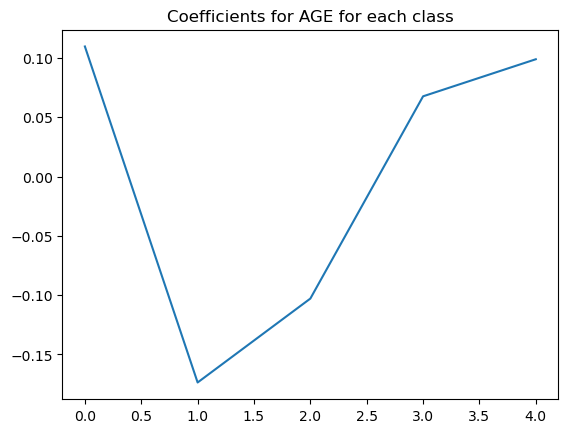

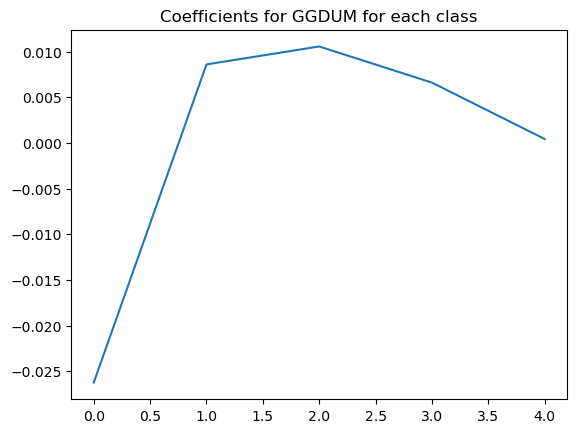

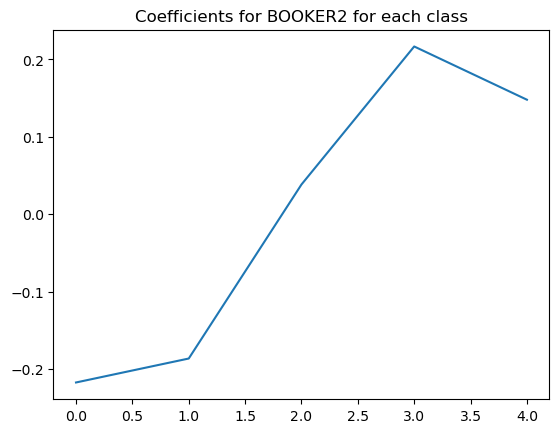

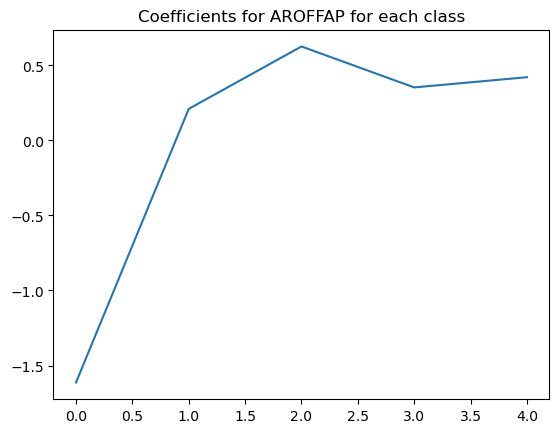

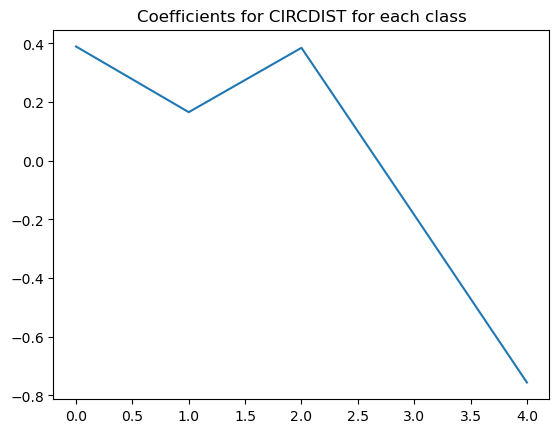

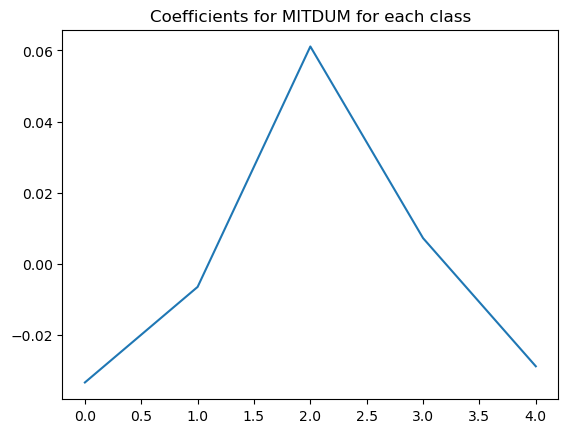

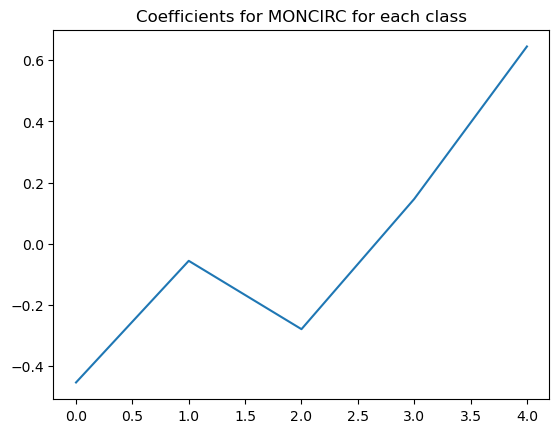

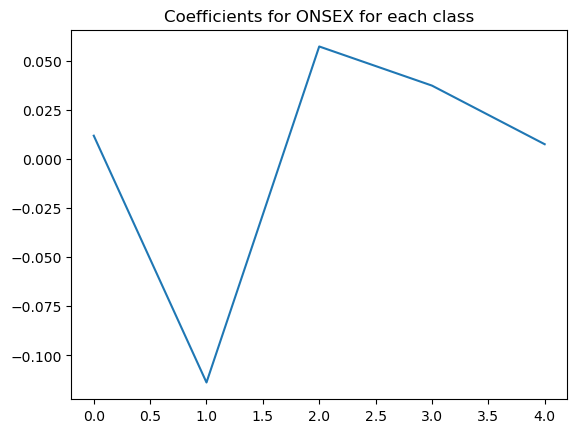

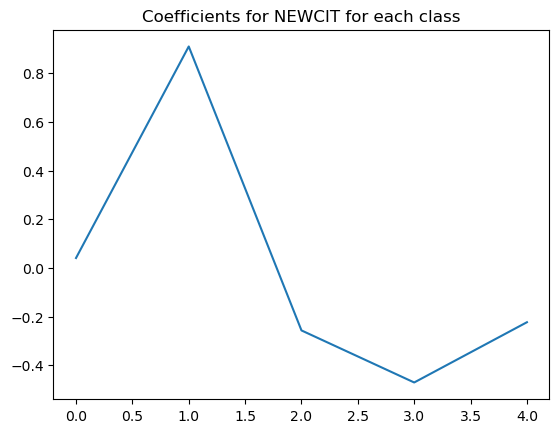

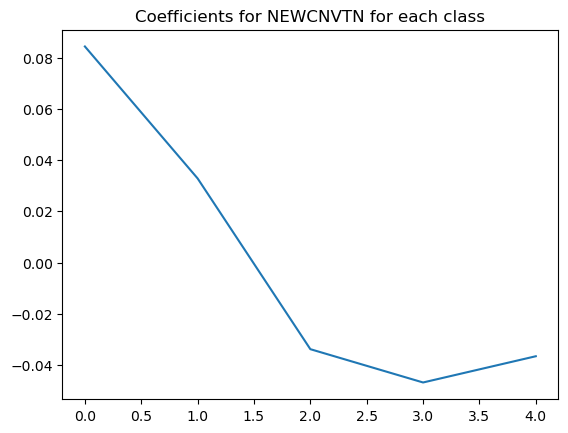

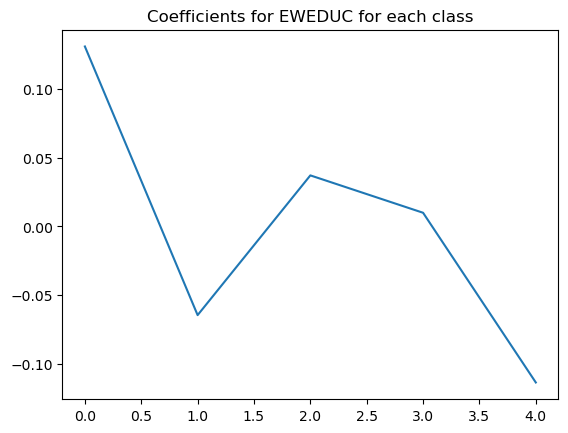

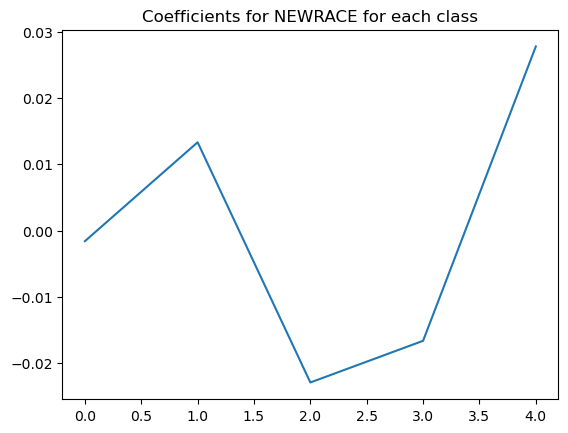

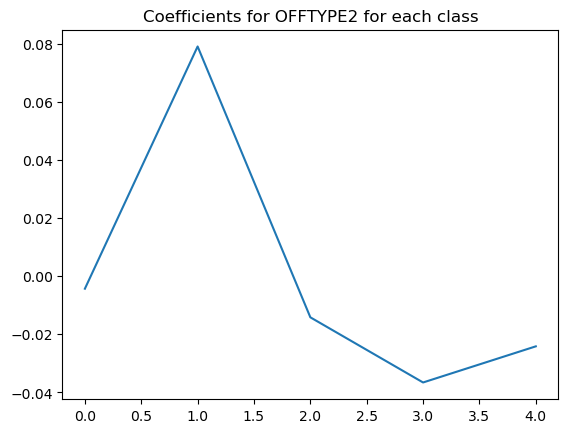

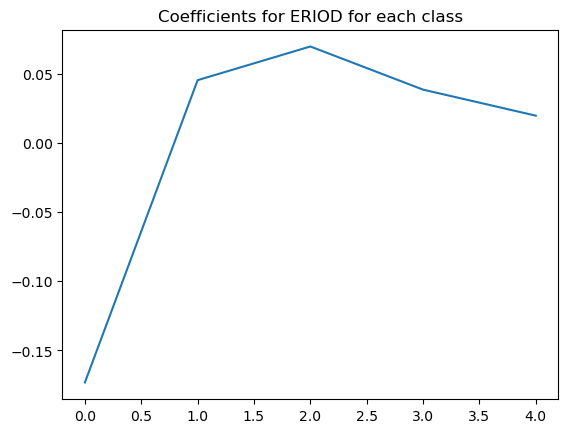

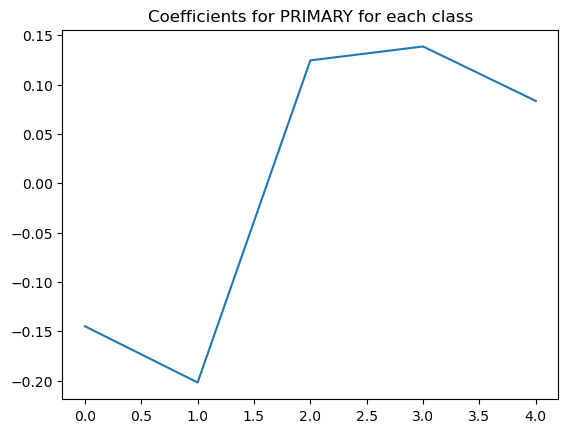

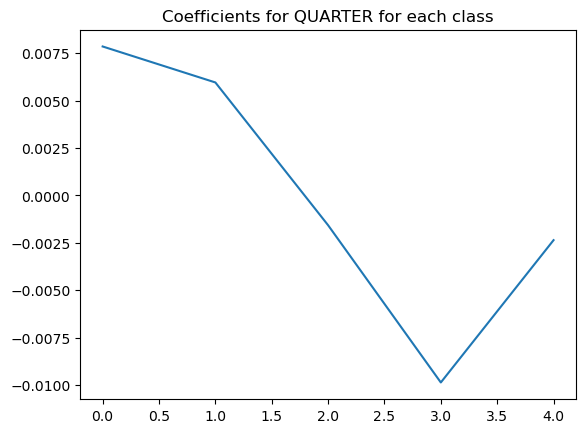

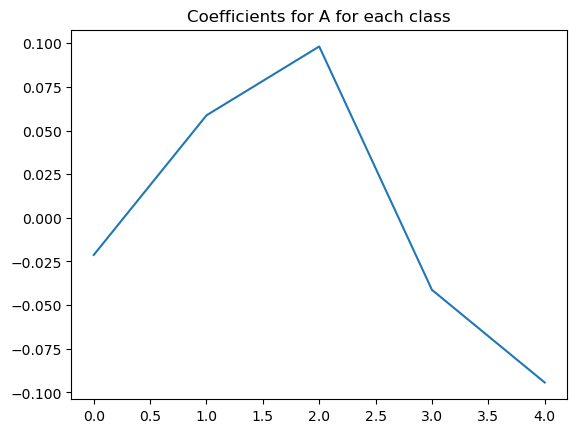

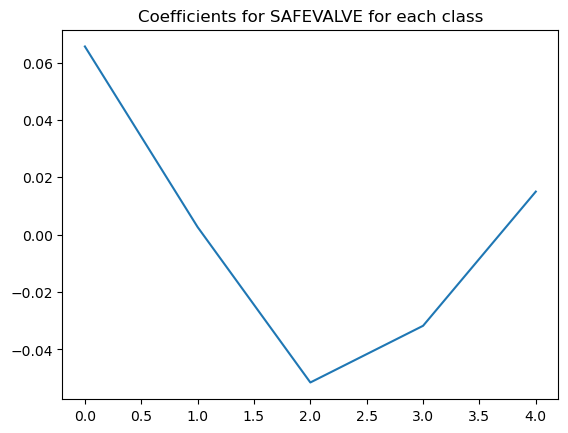

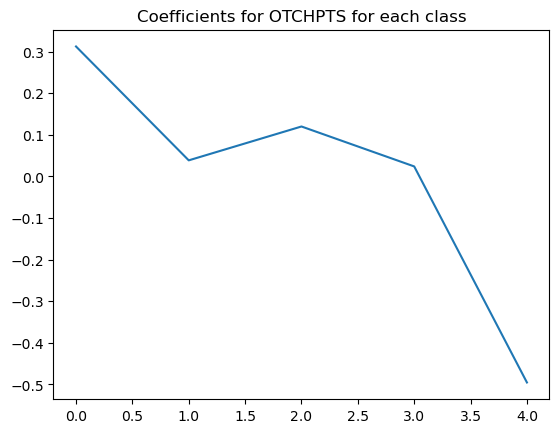

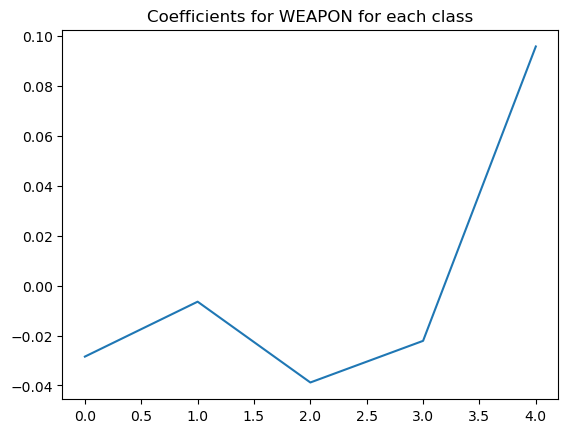

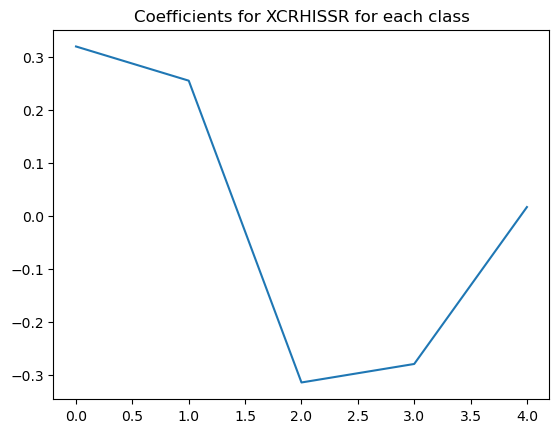

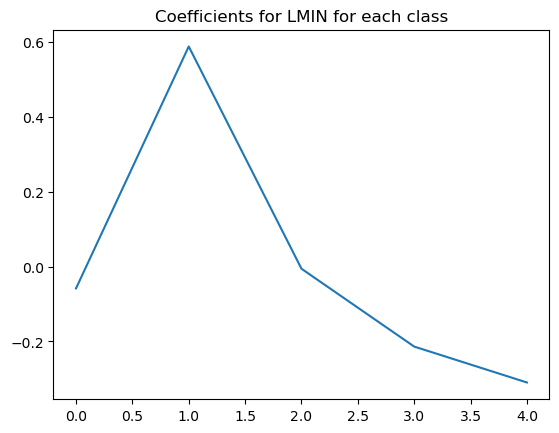

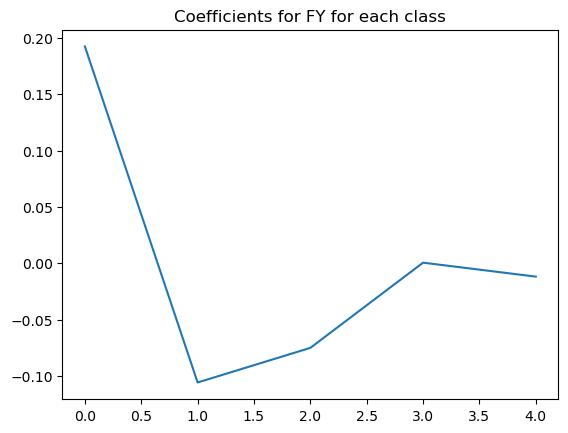

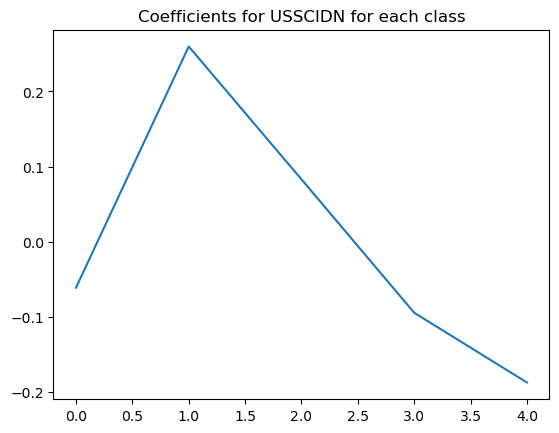

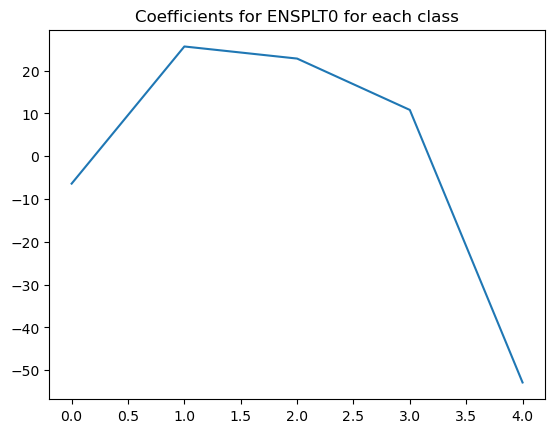

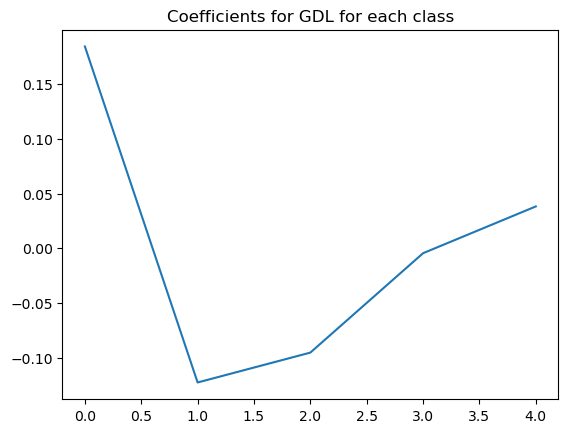

In [186]:
eda(gs_logreg, 'SENTIMP')

## Random Forest Classifier

In [187]:
with open('./sentimp/sentimp_gs_lg', 'rb') as p_in_gs:
    gs_logreg = pickle.load(p_in_gs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model info
    Best Estimator: LogisticRegression(C=1000, random_state=42)
    N Splits: 5
    N Features In: 27
    Best Score: 0.9151607142857143
    


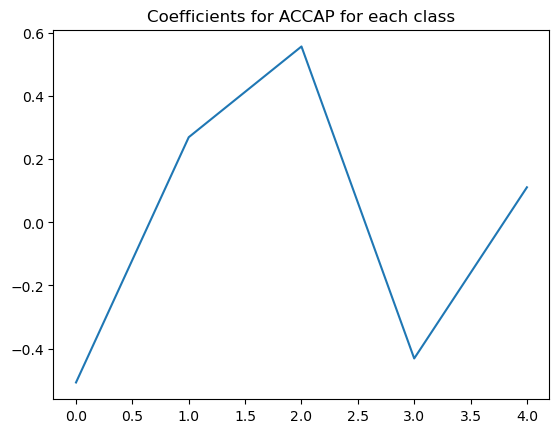

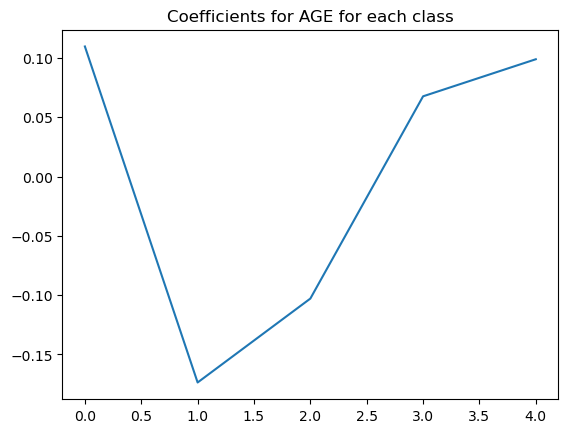

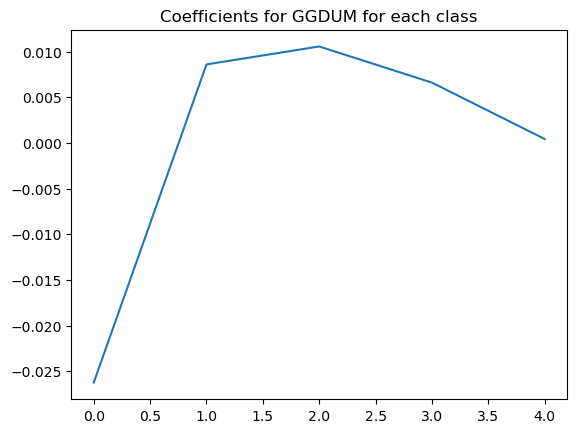

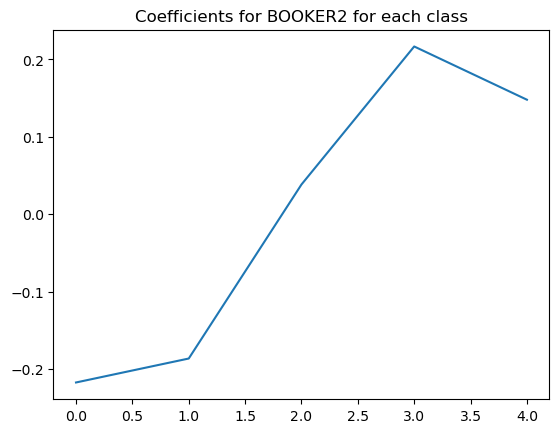

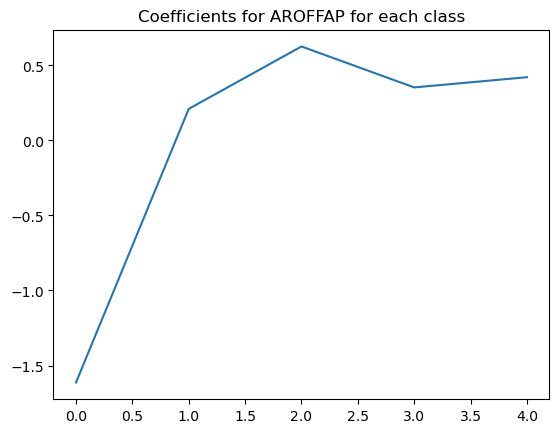

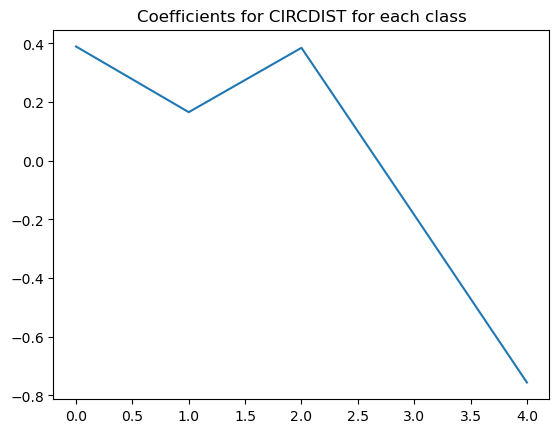

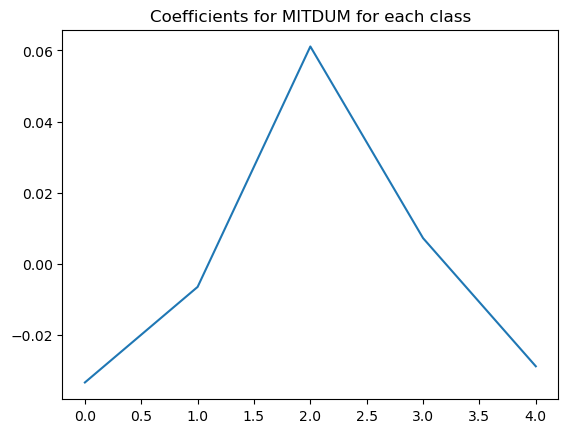

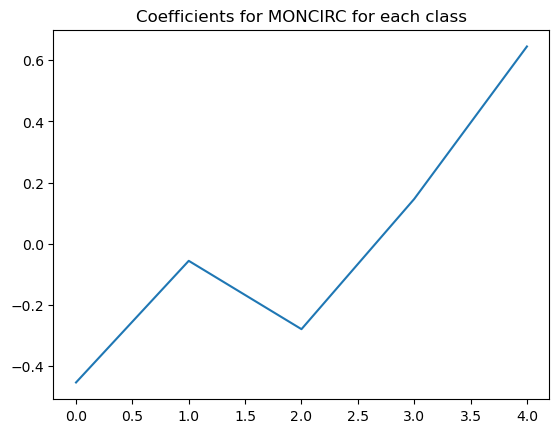

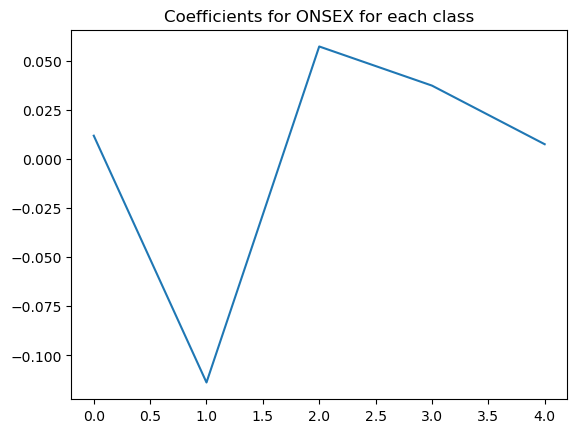

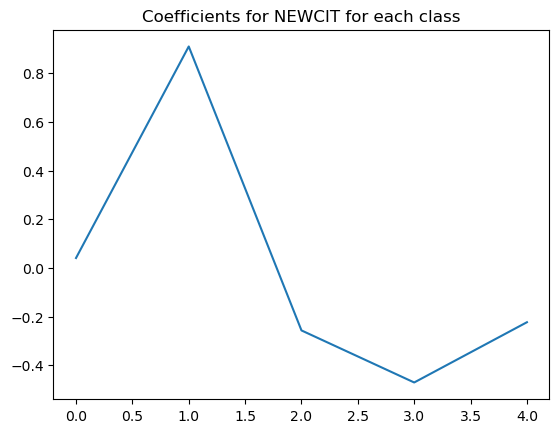

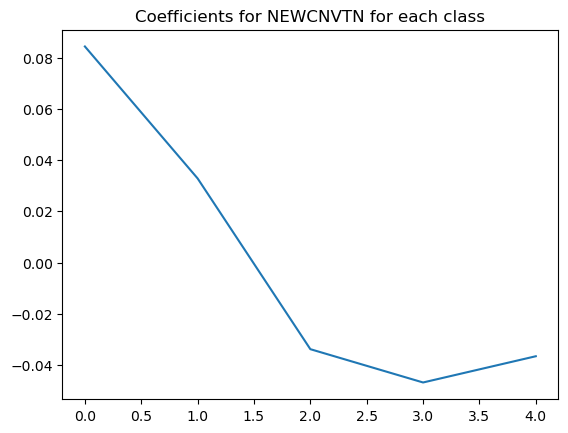

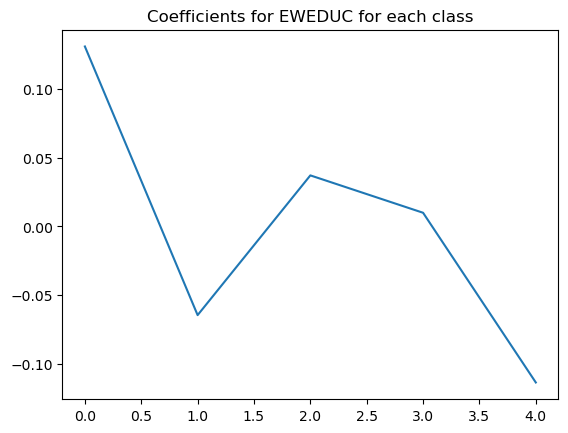

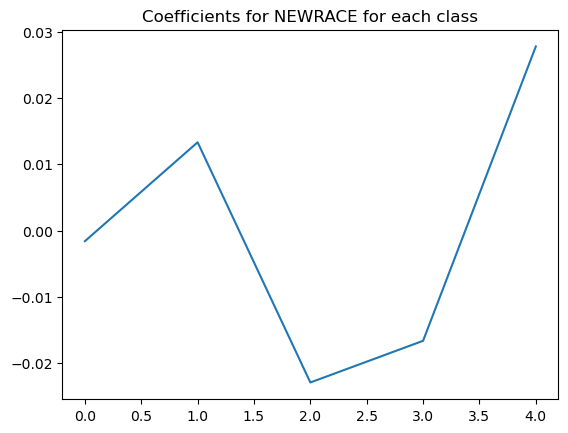

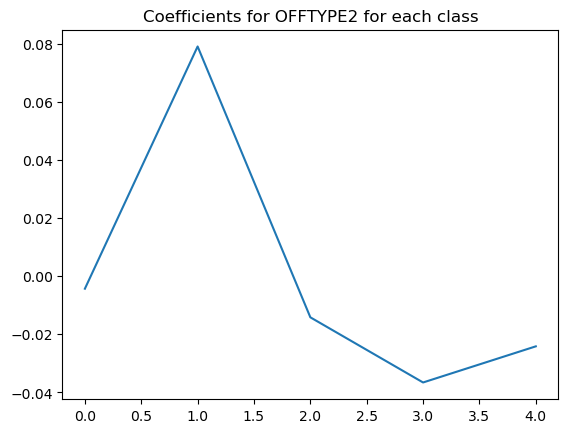

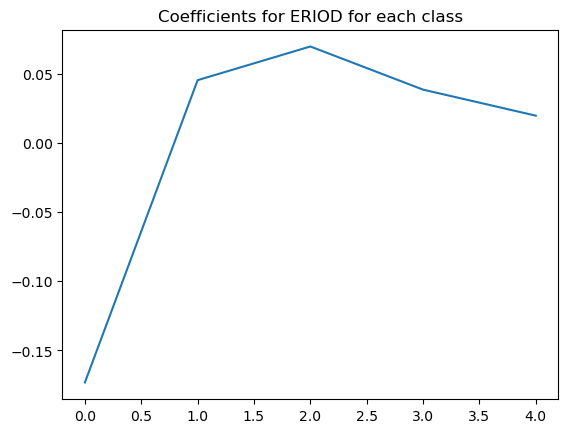

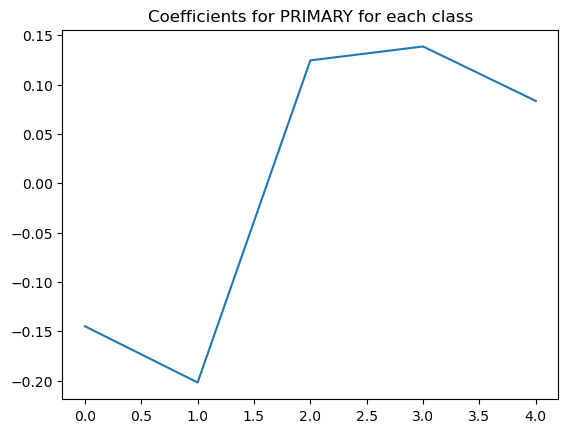

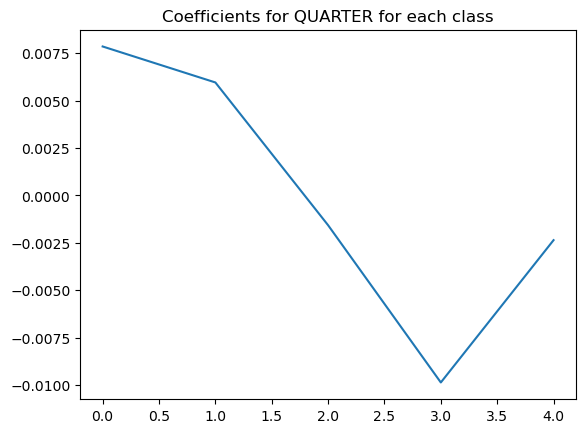

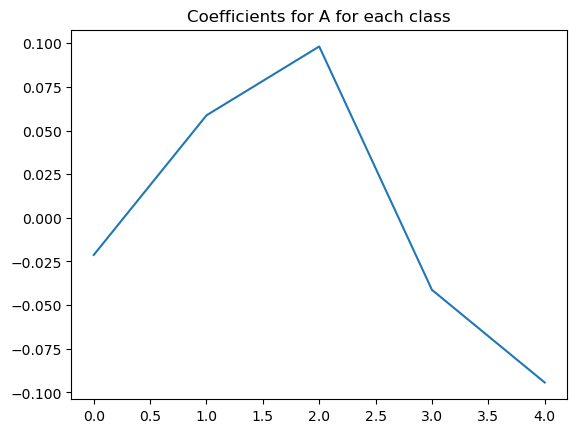

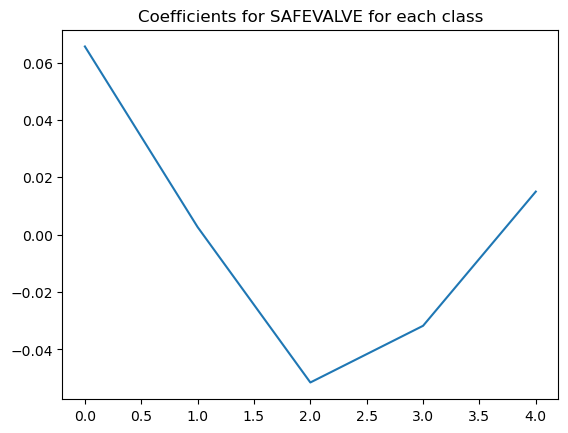

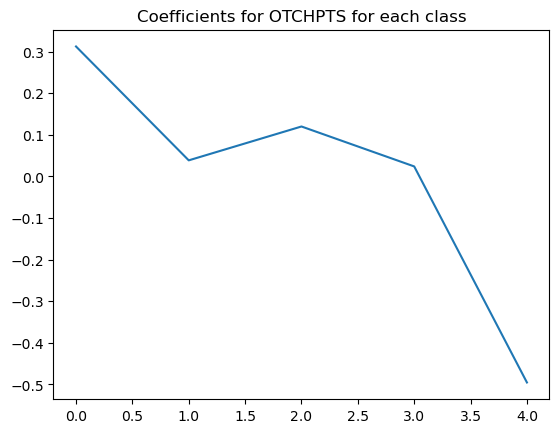

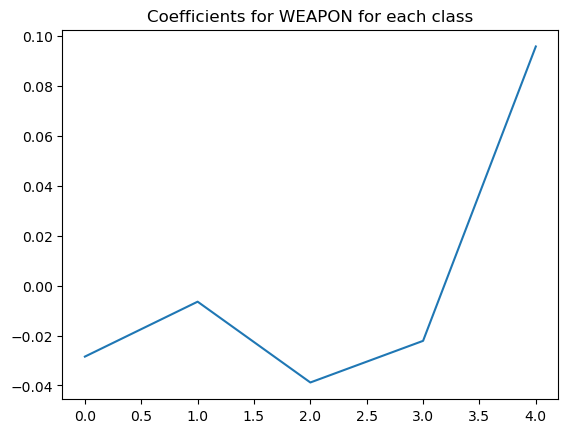

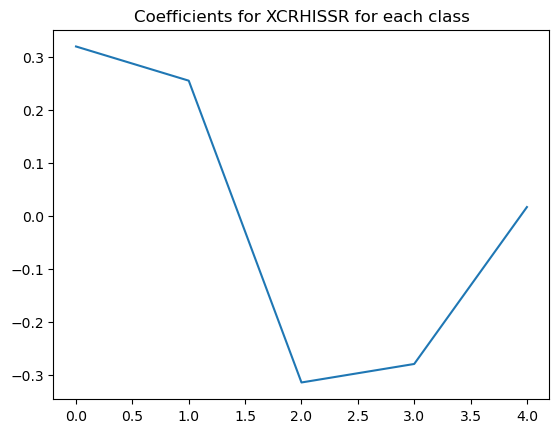

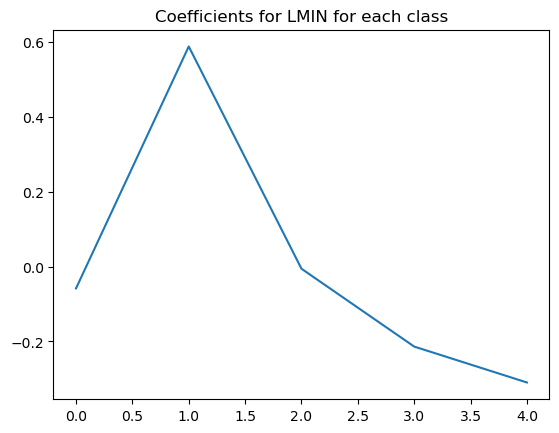

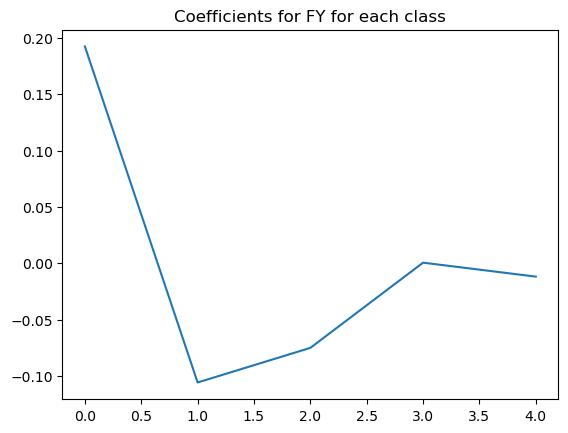

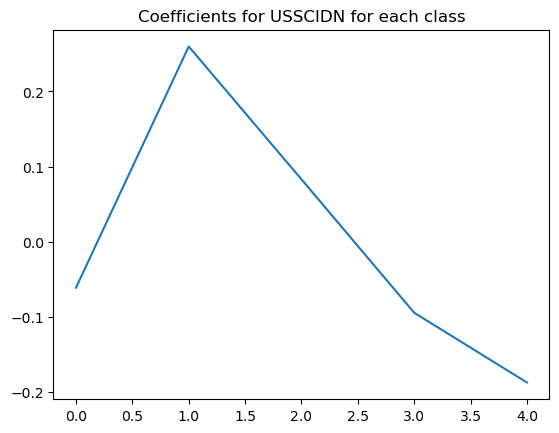

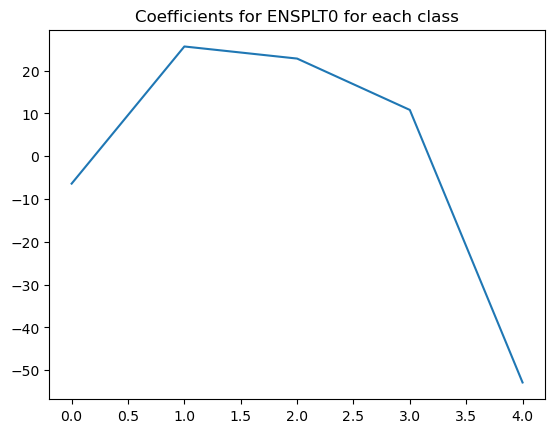

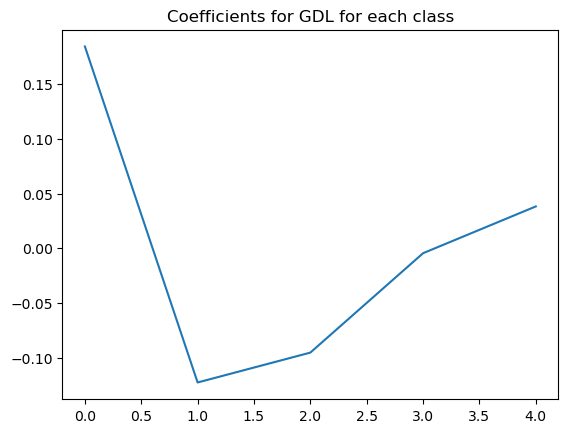

In [188]:
eda(gs_logreg, 'SENTIMP')

In [189]:
df_gs_logreg = pd.DataFrame(gs_logreg.best_estimator_.coef_, columns=[data.drop(columns='SENTIMP').columns]).T
df_gs_logreg

,0,1,2,3,4
ACCAP,-0.507563,0.270028,0.557708,-0.431421,0.111247
AGE,0.109749,-0.173611,-0.102849,0.067723,0.098988
GGDUM,-0.026225,0.008605,0.010568,0.006613,0.000438
BOOKER2,-0.217066,-0.186143,0.038529,0.216703,0.147976
AROFFAP,-1.613169,0.210772,0.626738,0.353861,0.421798
CIRCDIST,0.389519,0.165628,0.384992,-0.184287,-0.755853
MITDUM,-0.033253,-0.006414,0.061099,0.007276,-0.028708
MONCIRC,-0.454743,-0.056445,-0.280210,0.146025,0.645373
ONSEX,0.011806,-0.113771,0.057201,0.037296,0.007468
NEWCIT,0.040702,0.909399,-0.256660,-0.470432,-0.223009


In [204]:
# sort coef values for each split
for target_class in range(5):
    print(f'Top 10 Coefficients for Target {target_class}')
    print(f'for every one unit increase, the chance for it being target {target_class} increases by the coefficient.')
    print(np.exp(df_gs_logreg[target_class].sort_values(ascending=False)).head(10))
    print('\n')

Top 10 Coefficients for Target 0
for every one unit increase, the chance for it being target 0 increases by the coefficient.
CIRCDIST     1.476271
XCRHISSR     1.376724
OTCHPTS      1.366914
FY           1.212024
GDL          1.202562
EWEDUC       1.140081
AGE          1.115998
NEWCNVTN     1.088027
SAFEVALVE    1.067812
NEWCIT       1.041541
Name: 0, dtype: float64


Top 10 Coefficients for Target 1
for every one unit increase, the chance for it being target 1 increases by the coefficient.
ENSPLT0     1.366480e+11
NEWCIT      2.482830e+00
LMIN        1.799507e+00
ACCAP       1.310001e+00
USSCIDN     1.296776e+00
XCRHISSR    1.290796e+00
AROFFAP     1.234631e+00
CIRCDIST    1.180134e+00
OFFTYPE2    1.082379e+00
A           1.060437e+00
Name: 1, dtype: float64


Top 10 Coefficients for Target 2
for every one unit increase, the chance for it being target 2 increases by the coefficient.
ENSPLT0     8.100441e+09
AROFFAP     1.871496e+00
ACCAP       1.746665e+00
CIRCDIST    1.469603e+00
PRI

- High Sentencing results in Prison Only.
- Medium Sentences results in Prison + Confinement Conditions.
- Low Sentencing Probation + Confinement Conditions.

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


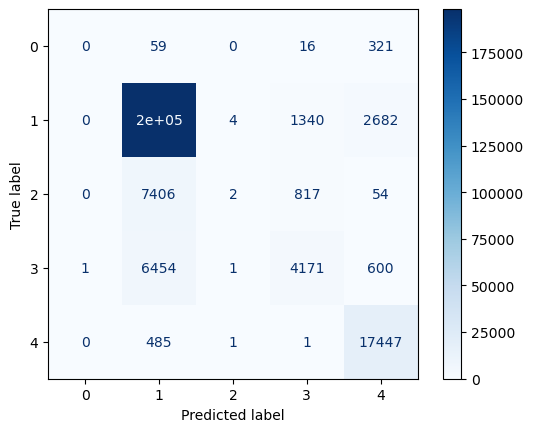

In [225]:
X = data.drop(columns='SENTIMP')
y = data['SENTIMP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

plot_confusion_matrix(gs_logreg, X_test_sc, y_test, cmap='Blues');